In [4]:
# Task 1 - 2
# TIES 4911
# Toni Pikkarainen
# 15.1.2020
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


tf.disable_v2_behavior()

'/Users/tonipikkarainen/master_degree/deeplearning/demos/demo1'

In [11]:
df = pd.read_csv("data/blood_pressure.csv",sep=';')


In [12]:
# Simple linear regression
# Lecture02, slide 20

# Model parameters
W = tf.Variable([1], dtype=tf.float32) 
b = tf.Variable([120], dtype=tf.float32) 
# Model input and output
x = tf.placeholder(tf.float32) 
linear_model = W*x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares # optimizer
optimizer = tf.train.GradientDescentOptimizer(0.00001)
train = optimizer.minimize(loss)
# training data
x_train = df['age'].tolist()
print(x_train)
y_train = df['Blood Pressure'].tolist()
print(y_train)
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(20000):
    sess.run(train, {x: x_train, y: y_train})
# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train}) 
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
# predict new values
x_predict = [20, 25, 54, 88]
predicted_values = [(W*x + b).eval(session=sess) for x in x_predict]
print(predicted_values)

[39, 45, 47, 65, 46, 67, 42, 67, 56, 64, 56, 59, 34, 42, 48, 45, 17, 20, 19, 36, 50, 39, 21, 44, 53, 63, 29, 25, 69]
[144, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128, 130, 135, 114, 116, 124, 136, 142, 120, 120, 160, 158, 144, 130, 125, 175]
W: [0.81156576] b: [103.999916] loss: 2612.8035
[array([120.23123], dtype=float32), array([124.28906], dtype=float32), array([147.82446], dtype=float32), array([175.4177], dtype=float32)]


In [8]:
# Linear Regressor with TensorFlow Estimators
# Lecture02, slide 30

# NumPy is often used to load, manipulate and preprocess data.
# import tensorflow as tf
# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.

estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns) 

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.

# Training and eval sets
x_train_est = np.array(df.loc[0:14, 'age'].tolist())
y_train_est = np.array(df.loc[0:14, 'Blood Pressure'].tolist())
x_eval = np.array(df.loc[15:30, 'age'].tolist())
y_eval = np.array(df.loc[15:30, 'Blood Pressure'].tolist())
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train_est}, y_train_est, batch_size=15, num_epochs=None, shuffle=True)


train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train_est}, y_train_est, batch_size=15, num_epochs=10000, shuffle=False)

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
   {"x": x_eval}, y_eval, batch_size=15, num_epochs=10000, shuffle=False)
# We can invoke 1000 training steps by invoking the method and 
# passing the training data set.
estimator.train(input_fn=input_fn, steps=1000)
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn) 
eval_metrics = estimator.evaluate(input_fn=eval_input_fn) 

print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

# Here we predict values for new inputs.
new_samples = np.array(x_predict) 
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": new_samples}, batch_size=4, num_epochs=1, shuffle=False)
predictions = list(estimator.predict(input_fn=predict_input_fn)) 
predicted_classes = [p["predictions"][0] for p in predictions] 
print("New Samples, Predictions: {}\n".format(predicted_classes))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9x/43t_pzm14r7fxvw8p041dzxm0000gn/T/tmpi2t8g51f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


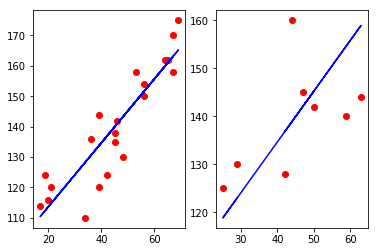

In [13]:
# Linear regression with scikit-learn


# Data Preprocessing
#dataset = pd.read_csv('studentscores.csv')
X = df.iloc[ : , 2 ].values
Y = df.iloc[ : , 3 ].values
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

# Fitting Simple Linear Regression Model to the training set
regressor = LinearRegression() 
regressor = regressor.fit(X_train, Y_train)
# Predecting the Result
Y_pred = regressor.predict(X_test)
#Visualization of Training results
plt.subplot(1, 2, 1)
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

#Visualization of Test results
plt.subplot(1, 2, 2)
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')
